In [21]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Building a Dataset

In [9]:
# Create a dataset of 100 rows and 10 features.
rows = 100
n_features = 10
np.random.seed(0)
features = np.random.randint(0,10,size=[rows,n_features])
# Target is a binary variable
target = np.random.randint(0,2,size=rows)

data = pd.DataFrame(features)
data['target'] = target
print('The size of the resulted dataset ', data.shape)

The size of the resulted dataset  (100, 11)


In [10]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,target
0,5,0,3,3,7,9,3,5,2,4,1
1,7,6,8,8,1,6,7,7,8,1,0
2,5,9,8,9,4,3,0,3,5,0,1
3,2,3,8,1,3,3,3,7,0,1,0
4,9,9,0,4,7,3,2,7,2,0,0
5,0,4,5,5,6,8,4,1,4,9,0
6,8,1,1,7,9,9,3,6,7,2,1
7,0,3,5,9,4,4,6,4,4,3,1
8,4,4,8,4,3,7,5,5,0,1,0
9,5,9,3,0,5,0,1,2,4,2,0


# Simple Training-Test Split

A reminder how to split your dataset into two groups: training and testing. 

In [27]:
data[data.columns[0:-1]]

,0,1,2,3,4,5,6,7,8,9
0,5,0,3,3,7,9,3,5,2,4
1,7,6,8,8,1,6,7,7,8,1
2,5,9,8,9,4,3,0,3,5,0
3,2,3,8,1,3,3,3,7,0,1
4,9,9,0,4,7,3,2,7,2,0
...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,1,1,6,8,8,3,2
96,0,7,4,6,0,5,3,3,9,4
97,9,0,6,5,3,0,0,1,2,0
98,2,2,9,6,7,8,9,8,2,4


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[0:-1]], data['target'], test_size=0.33, random_state=1)
print('Size of the original dataset: ', data.shape[0])
print('Size of the training dataset: ', X_train.shape[0])
print('Size of the testing dataset: ', X_test.shape[0])

Size of the original dataset:  100
Size of the training dataset:  67
Size of the testing dataset:  33


# k-Fold Simple Example 

In [16]:
def k_fold_Split(data, n_splits, shuffle, random_state, verbose=False):
    # Creating k-fold splitting 
    kfold = KFold(n_splits, shuffle, random_state)
    sizes = [0 , 0]
    for train, test in kfold.split(data):
        if verbose:
            print('train: indexes %s, val: indexes %s, size (training) %d, (val) %d' % (train, test, train.shape[0], test.shape[0]))
        sizes[0] += train.shape[0]
        sizes[1] += test.shape[0]
        
    return int(sizes[0]/n_splits), int(sizes[1]/n_splits)
        

In [17]:
sizes = k_fold_Split(data.head(10), n_splits=3, shuffle=True, random_state=1, verbose=True)
sizes

train: indexes [0 1 3 5 7 8], val: indexes [2 4 6 9], size (training) 6, (val) 4
train: indexes [2 4 5 6 7 8 9], val: indexes [0 1 3], size (training) 7, (val) 3
train: indexes [0 1 2 3 4 6 9], val: indexes [5 7 8], size (training) 7, (val) 3


(6, 3)

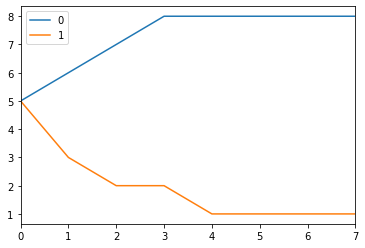

In [18]:
sizes = []
for k in range(2,10):
    sizes.append(k_fold_Split(data.head(10), n_splits=k, shuffle=True, random_state=1))
pd.DataFrame(sizes).plot()

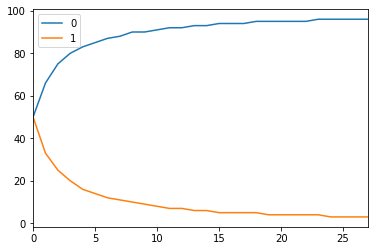

In [19]:
sizes = []
for k in range(2,30):
    sizes.append(k_fold_Split(data, n_splits=k, shuffle=True, random_state=1))
pd.DataFrame(sizes).plot()

# Leave-One-out-cross-validation LOOCV

In [31]:
from sklearn.model_selection import LeaveOneOut

In [32]:
cv = LeaveOneOut()

In [36]:
for train_ix, test_ix in cv.split(data.head(10)):
    print(train_ix)
    print(test_ix)

[1 2 3 4 5 6 7 8 9]
[0]
[0 2 3 4 5 6 7 8 9]
[1]
[0 1 3 4 5 6 7 8 9]
[2]
[0 1 2 4 5 6 7 8 9]
[3]
[0 1 2 3 5 6 7 8 9]
[4]
[0 1 2 3 4 6 7 8 9]
[5]
[0 1 2 3 4 5 7 8 9]
[6]
[0 1 2 3 4 5 6 8 9]
[7]
[0 1 2 3 4 5 6 7 9]
[8]
[0 1 2 3 4 5 6 7 8]
[9]
